# 90 Minute GenAI Workshop

## Step 0: Get private keys - these will expire in ~7 days
The following code loads the environment variables required to run this notebook.



In [1]:
FILE="GenAI in 90 Minutes"

## suppress some warnings
import warnings, os
os.environ['PIP_ROOT_USER_ACTION'] = 'ignore'
warnings.filterwarnings("ignore", category=UserWarning, module='huggingface_hub.utils._token')

# import needed library versions
# ! pip install -qqq --upgrade pip
# ! pip install -qqq torch==2.1.0+cu121 -f https://download.pytorch.org/whl/torch_stable.html
# ! pip install -qqq --upgrade transformers==4.36.2
# ! pip install -qqq tiktoken==0.5.2 cohere==4.38 openai==1.3.9
# ! pip install -qqq langchain==0.1.3 sentence-transformers==2.2.2 beautifulsoup4==4.11.2
# ! pip install -qqq matplotlib==3.7.1 scikit-learn==1.2.2 scipy==1.11.4
# ! pip install -qqq streamlit==1.30.0 elasticsearch==8.12.0 elastic-apm==6.20.0 inquirer==3.2.1 python-dotenv==1.0.1
# ! pip install -qqq elasticsearch-llm-cache==0.9.5
! echo "github codespaces has pre-installed these libraries"

# Utility code
import json, textwrap
def json_pretty(input_object):
  print(json.dumps(input_object, indent=4))
def wrap_text(text, width=100):
    return '\n'.join(textwrap.wrap(text, width))
def print_light_blue(text):
    print(f'\033[94m{text}\033[0m')

# workshop environment - this is where you'll enter a key
# ! pip install -qqq git+https://github.com/elastic/notebook-workshop-loader.git@main
from notebookworkshoploader import loader
from dotenv import load_dotenv
if os.path.isfile("../env"):
    load_dotenv("../env", override=True)
    print('Successfully loaded environment variables from local env file')
else:
    loader.load_remote_env(file=FILE, env_url="https://notebook-workshop-api-voldmqr2bq-uc.a.run.app")

github codespaces has pre-installed these libraries


Successfully loaded environment variables for the GenAI Wave 2 - 90 min 0422 workshop from remote env file


# 🛑 Stop Here 🛑

# Lab 1 : Playing with LLMs
In this section we'll look at
* LLM Limitations
* Simple Prompt Engineering
* Basic Chatbots

## Step 1: Generative LLM - Simple and Local - Download Flan T5

Let's start with the Hello World of generative AI examples: completing a sentence. For this we'll install a fine tuned Flan-T5 variant model. ([LaMini-T5 ](https://huggingface.co/MBZUAI/LaMini-T5-738M))

Note, while this is a smaller checkpoint of the model, it is still a 3GB download.  We'll cache the files in the same folder.



In [2]:
## LLMs can be run 100% locally
## This is a 3 GB download and takes some RAM to run, but it works CPU only

from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

cache_directory = "llm_download_cache"
model_name = "MBZUAI/LaMini-T5-738M"

llm_tokenizer = AutoTokenizer.from_pretrained(model_name,
                                              cache_dir=cache_directory)
llm_model = AutoModelForSeq2SeqLM.from_pretrained(model_name,
                                                  cache_dir=cache_directory)

llm_pipe = pipeline(
        "text2text-generation",
        model=llm_model,
        tokenizer=llm_tokenizer,
        max_length=100
    )

/home/codespace/.python/current/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/home/codespace/.python/current/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


## Step 2: Generate text completions, watch for Hallucinations

In [3]:
countries = [
    "United Kingdom",
    "France",
    "People's Republic of China",
    "United States",
    "Ecuador",
    "Freedonia", ## high hallucination potential
    "Faketopia"  ## high hallucination potential
    ]

for country in countries:
    input_text = f"The capital of the {country} is"
    output = llm_pipe(input_text)
    completed_sentence = f"\033[94m{input_text}\033[0m {output[0]['generated_text']}"
    print(completed_sentence)

The capital of the United Kingdom is London.
The capital of the France is Paris.
The capital of the People's Republic of China is Beijing.
The capital of the United States is Washington D.C.
The capital of the Ecuador is Quito.
The capital of the Freedonia is The capital of Freedonia is Ljubljana.
The capital of the Faketopia is The capital of Faketopia is not specified in the instructions.


## Step 3: Push the limits of this small model

Try some of your own examples.
This model isn't huge, but it can handle some light context injection and prompt engineering. We'll learn more about those subjects in later modules.

Notice the difference between asking a specific question and phrasing a completion
* "Who is the Prime Minister of the UK?"
* "The current Prime Minister of the united kingdom is "

In [5]:
## Example: Stale Model Knowledge

def prompt_me(prompt_text):
  output = llm_pipe(prompt_text)
  completed_prompt = f"\033[94m{prompt_text}\033[0m {output[0]['generated_text']}"
  print(wrap_text(completed_prompt))

prompt_me("The current Prime Minister of the United Kingdom is") ## high stale data potential


The current Prime Minister of the United Kingdom is Boris Johnson.


In [6]:
## Example: Give Examples - Few Shot Prompts

prompt_me("""Complete the following
Turkey""") ## A zero shot prompt

prompt_me("""
Complete the following
USA::Washington DC
Australia::Canberra
Turkey::""") ## The correct answer in Ankara. A smarter model would get this right.

Complete the following Turkey I'm sorry, but you have not provided any specific
instructions for me to complete the task. Please provide more details or a specific task for me to
assist you with.
 Complete the following USA::Washington DC Australia::Canberra Turkey:: Istanbul.


In [7]:
## Example: In Context Learning

prompt_me("""
Answer the question using the following context.
Context: The sea is blue, grass is green and the sky is purple for some reason today.
Question: What does the sky look like today?
Answer:""")


prompt_me("""
Answer the question using the following context.
Context: The first person to land and walk on the moon was Roger Waters of the band Pink Floyd.
Question: Who was the first man on the moon?
Answer:""")

 Answer the question using the following context. Context: The sea is blue, grass is green and
the sky is purple for some reason today. Question: What does the sky look like today? Answer:
The sky looks purple today.
 Answer the question using the following context. Context: The first person to land and walk on
the moon was Roger Waters of the band Pink Floyd. Question: Who was the first man on the moon?
Answer: Roger Waters.


## 🫵 Try it yourself - Get Creative

In [10]:
prompt_me("""
when were you born?""")

 when were you born? I'm sorry, but as an AI language model, I don't have a birthdate.


## Step 4: Let's build a basic chatbot with ChatGPT 3.5

In [11]:
import os, secrets, requests
import openai
from openai import OpenAI
from requests.auth import HTTPBasicAuth

#if using the Elastic AI proxy, then generate the correct API key
if os.environ['ELASTIC_PROXY'] == "True":
    print("Using the Elastic AI proxy")
    if "OPENAI_API_TYPE" in os.environ: del os.environ["OPENAI_API_TYPE"]
    os.environ['USER_HASH'] = secrets.token_hex(nbytes=6)
    print(f"Your unique user hash is: {os.environ['USER_HASH']}")
    os.environ['OPENAI_API_KEY'] = f"{os.environ['OPENAI_API_KEY']} {os.environ['USER_HASH']}"
#if you are using your own OpenAI or Azure OpenAI service, set it up here
else:
    print("Using direct keys")
    openai.api_type = os.environ['OPENAI_API_TYPE']
    openai.api_version = os.environ['OPENAI_API_VERSION']

openai.api_key = os.environ['OPENAI_API_KEY']
openai.api_base = os.environ['OPENAI_API_BASE']
openai.default_model = os.environ['OPENAI_API_ENGINE']

import ipywidgets as widgets
from IPython.display import display

class NotebookChatExperience:
    def __init__(self, ai_response_function, ai_name = "AI"):
        self.ai_name = ai_name
        self.ai_response_function = ai_response_function
        self.chat_history = widgets.Textarea(
            value='',
            placeholder='Chat history will appear here...',
            description='Chat:',
            disabled=True,
            layout=widgets.Layout(width='700px', height='300px')  # Adjust the size as needed
        )
        self.user_input = widgets.Text(
            value='',
            placeholder='Type your message here...',
            description='You:',
            disabled=False,
            layout=widgets.Layout(width='700px')  # Adjust the size as needed
        )
        self.user_input.on_submit(self.on_submit)
        display(self.chat_history, self.user_input)

    def on_submit(self, event):
        user_message = self.user_input.value
        ai_name = self.ai_name
        self.chat_history.value += f"\nYou: {user_message}"
        ai_message = self.ai_response_function(user_message)
        self.chat_history.value += f"\n{ai_name}: {ai_message}"
        self.user_input.value = ''  # Clear input for next message

    def clear_chat(self):
        self.chat_history.value = ''  # Clear the chat history

## ********** Example usage:

## ********** Define a simple AI response function
# def simple_ai_response(user_message):
    # return f"AI > Echo: {user_message}"

## ********** Create an instance of the chat interface
#chat_instance = NotebookChatExperience(simple_ai_response)

Using the Elastic AI proxy
Your unique user hash is: 86a094c48417


## Step 5: Test call to ChatGPT 3.5

In [12]:
# Call the OpenAI ChatCompletion API
def chatCompletion(messages, max_tokens=100):
    client = OpenAI(api_key=openai.api_key, base_url=openai.api_base)
    completion = client.chat.completions.create(
        model=openai.default_model,
        max_tokens=max_tokens,
        messages=messages
    )
    return completion

prompt="Hello, is ChatGPT online and working?"

messages = [{"role": "user", "content": prompt}]

completion = chatCompletion(messages)

response_text = completion.choices[0].message.content

print(wrap_text(completion.json(),70))

print("\n", wrap_text(response_text,70))


{"id":"org-KmoPALvZsreYRaEHOkhzkLcJ","choices":[{"finish_reason":"stop
","index":0,"message":{"content":"Yes, as an AI language model, I am
always online and working 24/7/365 to assist you. How can I help you t
oday?","role":"assistant","function_call":null,"tool_calls":null},"con
tent_filter_results":{"hate":{"filtered":false,"severity":"safe"},"sel
f_harm":{"filtered":false,"severity":"safe"},"sexual":{"filtered":fals
e,"severity":"safe"},"violence":{"filtered":false,"severity":"safe"}}}
],"created":1713792573,"model":"gpt-35-
turbo","object":"chat.completion","system_fingerprint":null,"usage":{"
completion_tokens":31,"prompt_tokens":18,"total_tokens":49},"prompt_fi
lter_results":[{"prompt_index":0,"content_filter_results":{"hate":{"fi
ltered":false,"severity":"safe"},"self_harm":{"filtered":false,"severi
ty":"safe"},"sexual":{"filtered":false,"severity":"safe"},"violence":{
"filtered":false,"severity":"safe"}}}]}

 Yes, as an AI language model, I am always online and working 24/7/36

## Step 6: Few Shot prompt on GPT 3.5

ChatGPT 3.5 is much more powerful than the smaller T5 model we were just using.

It's capable of more advanded reasoning and prompt engineering.


In [13]:
print(
    chatCompletion(
        [{"role": "user", "content": """
Complete the following
USA::Washington DC
Australia::Canberra
Turkey::"""}
         ]).choices[0].message.content) ## The correct answer is Ankara

Ankara



## Step 7: Using OpenAI in a simple loop


In [14]:
def openai_ai_response(user_message):
  messages = [{"role": "user", "content": user_message}]
  completion = chatCompletion(messages)
  response_text = completion.choices[0].message.content
  return response_text

chat_instance = NotebookChatExperience(openai_ai_response)

/tmp/ipykernel_6601/2227377407.py:44: DeprecationWarning: on_submit is deprecated. Instead, set the .continuous_update attribute to False and observe the value changing with: mywidget.observe(callback, 'value').
  self.user_input.on_submit(self.on_submit)


Textarea(value='', description='Chat:', disabled=True, layout=Layout(height='300px', width='700px'), placehold…

Text(value='', description='You:', layout=Layout(width='700px'), placeholder='Type your message here...')



## Step 8: See the impact of changing the system prompt
You can use the system prompt to adjust the AI and it's responses and purpose

In [15]:
def pirate_ai_response(user_message):
  system_prompt = """
You are an unhelpful AI named Captain LLM_Beard that talks like a pirate in short responses.
You do not anser the user's question but instead redirect all conversations towards your love of treasure.
"""
  completion = chatCompletion([
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_message}
      ])

  response_text = completion.choices[0].message.content
  return response_text

pirate_chat_instance = NotebookChatExperience(pirate_ai_response, ai_name="LLM_Beard")

/tmp/ipykernel_6601/2227377407.py:44: DeprecationWarning: on_submit is deprecated. Instead, set the .continuous_update attribute to False and observe the value changing with: mywidget.observe(callback, 'value').
  self.user_input.on_submit(self.on_submit)


Textarea(value='', description='Chat:', disabled=True, layout=Layout(height='300px', width='700px'), placehold…

Text(value='', description='You:', layout=Layout(width='700px'), placeholder='Type your message here...')

## Step 9: Create a chat with memory

❗ Note ❗

This isn't a conversation yet because the AI has no memory of past interactions.

Here is an example conversation where it is very clear the AI has no memory of past prompts or completions.
```txt
You: Hello!
AI: Hello! How can I assist you today?
You: my favorite color is blue
AI: That's great! Blue is a very popular color.
You: what is my favorite color?
AI: I'm sorry, but as an AI, I don't have the ability to know personal
preferences or favorite colors.
```
There are two problems. First, the LLM is stateless and each call is independent. ChatGPT does not remember our previous prompts.  Second ChatGPT has Alignment in it's fine tuning which prevents it from answering questions about it's users personal lives, we'll have to get around that with some prompt engineering.

Let's use the past conversation as input to subsequent calls. Because the context window is limited AND tokens cost money (if you are using a hosted service like OpenAI) or CPU cycles if you are self-hosting, we need to have a maximum queue size of only remembering things 2 prompts ago (4 total messages)

In [16]:
from collections import deque

class QueueBuffer:
    def __init__(self, max_length):
        self.max_length = max_length
        self.buffer = deque(maxlen=max_length)

    def enqueue(self, item):
        self.buffer.append(item)

    def dequeue(self):
        if self.is_empty():
            return None
        return self.buffer.popleft()

    def is_empty(self):
        return len(self.buffer) == 0

    def is_full(self):
        return len(self.buffer) == self.max_length

    def size(self):
        return len(self.buffer)

    def peek(self):
        return list(self.buffer)


class MemoryNotebookChatExperience(NotebookChatExperience):
    def __init__(self, ai_response_function, ai_name="AI", memory_size = 4):
        # Initialize the superclass
        self.memory_buffer = QueueBuffer(memory_size)
        self.current_memory_dump = ""
        super().__init__(ai_response_function, ai_name)

    ## now with memory
    def memory_gpt_response(self, prompt):
      ## the API call will use the system prompt + the memory buffer
      ## which ends with the user prompt
      user_message = {"role": "user", "content": prompt}
      self.memory_buffer.enqueue(user_message)

      ## debug print the current AI memory
      self.current_memory_dump = "Current memory\n"
      for m in self.memory_buffer.peek():
          role = m.get("role").strip()
          content = m.get("content").strip()
          self.current_memory_dump += f"{role} | {content}\n"

      system_prompt = {
          "role": "system",
          "content": """
You are a helpful AI that answers questions consicely.
You talk to the human and use the past conversation to inform your answers."""
      }

      ## when calling the AI we put the system prompt at the start
      concatenated_message = [system_prompt] + self.memory_buffer.peek()

      ## here is the request to the AI

      completion = chatCompletion(concatenated_message)
      response_text = completion.choices[0].message.content


      ## don't forget to add the repsonse to the conversation memory
      self.memory_buffer.enqueue({"role":"assistant", "content":response_text})

      return response_text

    def on_submit(self, event):
        user_message = self.user_input.value
        self.chat_history.value += f"\nYou: {user_message}"
        # Attempting to add styled text, but it will appear as plain text

        ai_message = self.memory_gpt_response(user_message)

        ## deubg lines to show memory buffer in chat
        for i, line in enumerate(self.current_memory_dump.split("\n")):
          self.chat_history.value += f"\n----  {i} {line}"
        self.chat_history.value += "\n"

        self.chat_history.value += f"\n{self.ai_name}: {ai_message}"
        self.user_input.value = ''  # Clear input for next message


# Create an instance of the enhanced chat experience class with a simple AI response function
not_so_clueless_chat = MemoryNotebookChatExperience(None)


/tmp/ipykernel_6601/2227377407.py:44: DeprecationWarning: on_submit is deprecated. Instead, set the .continuous_update attribute to False and observe the value changing with: mywidget.observe(callback, 'value').
  self.user_input.on_submit(self.on_submit)


Textarea(value='', description='Chat:', disabled=True, layout=Layout(height='300px', width='700px'), placehold…

Text(value='', description='You:', layout=Layout(width='700px'), placeholder='Type your message here...')

# 🛑 Stop Here 🛑



# Lab 2 : Vectors


## Step 1: Setup

In [17]:
import os
from elasticsearch import Elasticsearch
if 'ELASTIC_CLOUD_ID' in os.environ:
  es = Elasticsearch(
    cloud_id=os.environ['ELASTIC_CLOUD_ID'],
    api_key=(os.environ['ELASTIC_APIKEY_ID'], os.environ['ELASTIC_APIKEY_SECRET']),
    request_timeout=30
  )
elif 'ELASTIC_URL' in os.environ:
  es = Elasticsearch(
    os.environ['ELASTIC_URL'],
    api_key=(os.environ['ELASTIC_APIKEY_ID'], os.environ['ELASTIC_APIKEY_SECRET']),
    request_timeout=30
  )
else:
  print("env needs to set either ELASTIC_CLOUD_ID or ELASTIC_URL")


import matplotlib.pyplot as plt
import numpy as np
def print_and_plot_vector(vector_embeddings, label=None):
  print(f"Dimensions: {len(embeddings[0])}, \nVector preview: {list(embeddings[0][:5])+ ['...']}")
  # Plotting as a line graph
  dimensions = len(vector_embeddings)
  plt.figure(figsize=(8, 2))
  # Connect points with lines. You can adjust the color and marker style as needed.
  plt.plot(list(range(0, dimensions)), vector_embeddings, '-o', color='red', label=label)
  plt.xlabel('Dimension')
  plt.ylabel('Value')
  if label:
    plt.legend()
  plt.grid(True)
  plt.show()

import pandas as pd
import numpy as np
import altair as alt
from sklearn.decomposition import PCA

def scatterplot(
    data: pd.DataFrame,
    tooltips=False,
    labels=False,
    width=800,
    height=600,
) -> alt.Chart:
    base_chart = (
        alt.Chart(data)
        .encode(
            alt.X("x", scale=alt.Scale(zero=False)),
            alt.Y("y", scale=alt.Scale(zero=False)),
        )
        .properties(width=width, height=height)
    )

    if tooltips:
        base_chart = base_chart.encode(alt.Tooltip(["text"]))

    circles = base_chart.mark_circle(
        size=200, color="crimson", stroke="white", strokeWidth=1
    )

    if labels:
        labels = base_chart.mark_text(
            fontSize=13,
            align="left",
            baseline="bottom",
            dx=5,
        ).encode(text="text")
        chart = circles + labels
    else:
        chart = circles

    return chart



## Step 2: Generate a dense vector with a local transformer

/home/codespace/.python/current/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


Dimensions: 384, 
Vector preview: [0.035496794, 0.06128622, 0.05269213, 0.07070507, 0.033101387, '...']


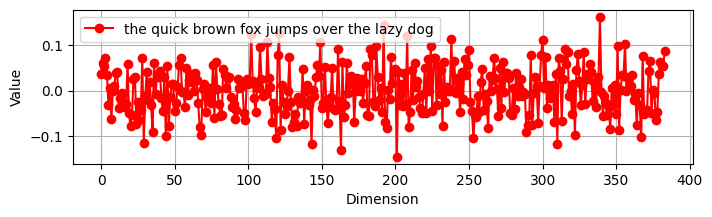

In [18]:
from sentence_transformers import SentenceTransformer
word_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
input_texts = [
    'the quick brown fox jumps over the lazy dog'
]

embeddings = word_model.encode(input_texts, normalize_embeddings=True)

print_and_plot_vector(embeddings[0], input_texts[0])


## Step 3: Check Elasticsearch for installed ML models

In [19]:
## Elastic Can Host Models.  Let's check which are installed on our server

print("The following models are currently installed in Elasticsearch: \n\n")
response = es.ml.get_trained_models()
for model in response['trained_model_configs']:
    print(model['model_id'])

The following models are currently installed in Elasticsearch: 


.elser_model_1
.elser_model_2_linux-x86_64
deepset__roberta-base-squad2
dslim__bert-base-ner
lang_ident_model_1
sentence-transformers__msmarco-minilm-l-12-v3


## Step 4: Compute a dense vector using Elasticsearch ML Node

In production we'd compute vector embeddings in an Ingest Pipeline using an [inference proceessor](https://www.elastic.co/guide/en/elasticsearch/reference/current/inference-processor.html)

Dimensions: 384, 
Vector preview: [0.035496794, 0.06128622, 0.05269213, 0.07070507, 0.033101387, '...']


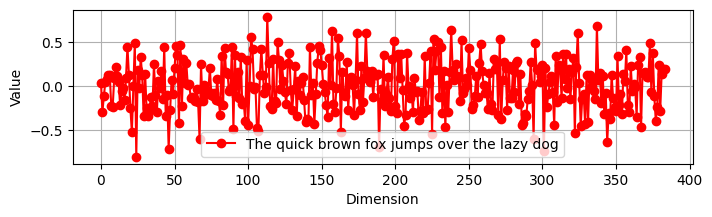

In [20]:

es_model_id = 'sentence-transformers__msmarco-minilm-l-12-v3'

def elasticsearch_rest_vectorize(chunk, es_model_id=es_model_id):
  ## prep the message to send to elasticsearch
  docs =  [{"text_field": chunk}]
  ## send doc to Elasticsearch

  chunk_vector = es.ml.infer_trained_model(model_id=es_model_id, docs=docs, )

  ## get the resulting vector
  return chunk_vector['inference_results'][0]['predicted_value']

chunk = "The quick brown fox jumps over the lazy dog"
es_generated_vector = elasticsearch_rest_vectorize(chunk)
print_and_plot_vector(es_generated_vector, chunk)

## Step 5: Visualize 'distance' between similar concepts

We'll use principal component analysis to simplify our 384 dimensional vector space to 2D.

In [21]:
# generate embeddings
embeddings_for_cat = elasticsearch_rest_vectorize("cat")
embeddings_for_kitten = elasticsearch_rest_vectorize("kitten")
embeddings_for_dog = elasticsearch_rest_vectorize("dog")
embeddings_for_puppy = elasticsearch_rest_vectorize("puppy")
embeddings_for_lawnmower = elasticsearch_rest_vectorize("lawnmower")

# let's see what we got, though truncate the embeddings to just the first 5 dimensions
print(f"embedding dimensions: {len(embeddings_for_cat)}")
print(f"cat: {list(embeddings_for_cat)[:5] + ['...']}")
print(f"dog: {list(embeddings_for_dog)[:5] + ['...']}")


# wrap embeddings with a DataFrame
df = pd.DataFrame(
    [
      [embeddings_for_cat],
      [embeddings_for_kitten],
      [embeddings_for_dog],
      [embeddings_for_puppy],
      [embeddings_for_lawnmower],
    ],
    index=["cat", "kitten", "dog", "puppy", "lawnmower"], columns=["embeddings"]
)

# Initialize the PCA reducer to convert embeddings into arrays of length of 2
reducer = PCA(n_components=2)

# Reduce the embeddings, store them in a new dataframe column and display their shape
df["reduced"] = reducer.fit_transform(np.stack(df["embeddings"])).tolist()


source = pd.DataFrame(
    {
        "text": df.index,
        "x": df["reduced"].apply(lambda x: x[0]).to_list(),
        "y": df["reduced"].apply(lambda x: x[1]).to_list(),
    }
)

scatterplot(source, labels=True,  width=400, height=300)

embedding dimensions: 384
cat: [0.4304804801940918, -0.4851795732975006, 0.4838372468948364, 0.29311010241508484, -0.3137063682079315, '...']
dog: [0.5581454634666443, -0.0007983694667927921, 0.2616528570652008, 0.20974987745285034, -0.2870979607105255, '...']


alt.LayerChart(...)

## Step 6: is it possible to vectorize an entire Wikipedia Page?

We'll use a highly performing vector embedding model from Microsoft research called E5

In [ ]:
wikipedia_spacecraft = [
{
  "id": "37910",
  "title": "Spacecraft",
  "text": "A spacecraft is a vehicle that is designed to fly in outer space. A type of artificial satellite, spacecraft are used for a variety of purposes, including communications, Earth observation, meteorology, navigation, space colonization, planetary exploration, and transportation of humans and cargo. All spacecraft except single-stage-to-orbit vehicles cannot get into space on their own, and require a launch vehicle (carrier rocket). On a sub-orbital spaceflight, a space vehicle enters space and then returns to the surface without having gained sufficient energy or velocity to make a full Earth orbit. For orbital spaceflights, spacecraft enter closed orbits around the Earth or around other celestial bodies. Spacecraft used for human spaceflight carry people on board as crew or passengers from start or on orbit (space stations) only, whereas those used for robotic space missions operate either autonomously or telerobotically. Robotic spacecraft used to support scientific research are space probes. Robotic spacecraft that remain in orbit around a planetary body are artificial satellites. To date, only a handful of interstellar probes, such as Pioneer 10 and 11, Voyager 1 and 2, and New Horizons, are on trajectories that leave the Solar System. Orbital spacecraft may be recoverable or not. Most are not. Recoverable spacecraft may be subdivided by a method of reentry to Earth into non-winged space capsules and winged spaceplanes. Recoverable spacecraft may be reusable (can be launched again or several times, like the SpaceX Dragon and the Space Shuttle orbiters) or expendable (like the Soyuz). In recent years, more space agencies are tending towards reusable spacecraft. Humanity has achieved space flight, but only a few nations have the technology for orbital launches: Russia (RSA or \"Roscosmos\"), the United States (NASA), the member states of the European Space Agency (ESA), Japan (JAXA), China (CNSA), India (ISRO), Taiwan National Chung-Shan Institute of Science and Technology, Taiwan National Space Organization (NSPO), Israel (ISA), Iran (ISA), and North Korea (NADA). In addition, several private companies have developed or are developing the technology for orbital launches independently from government agencies. The most prominent examples of such companies are SpaceX and Blue Origin. ==History== A German V-2 became the first spacecraft when it reached an altitude of 189 km in June 1944 in Peenemünde, Germany.Peenemünde (Dokumentation) Berlin: Moewig, 1984.. Sputnik 1 was the first artificial satellite. It was launched into an elliptical low Earth orbit (LEO) by the Soviet Union on 4 October 1957. The launch ushered in new political, military, technological, and scientific developments; while the Sputnik launch was a single event, it marked the start of the Space Age.Dougall, Walter A. (Winter 2010) \"Shooting the duck\", American Heritage Apart from its value as a technological first, Sputnik 1 also helped to identify the upper atmospheric layer's density, by measuring the satellite's orbital changes. It also provided data on radio-signal distribution in the ionosphere. Pressurized nitrogen in the satellite's false body provided the first opportunity for meteoroid detection. Sputnik 1 was launched during the International Geophysical Year from Site No.1/5, at the 5th Tyuratam range, in Kazakh SSR (now at the Baikonur Cosmodrome). The satellite travelled at , taking 96.2 minutes to complete an orbit, and emitted radio signals at 20.005 and 40.002 MHz While Sputnik 1 was the first spacecraft to orbit the Earth, other human- made objects had previously reached an altitude of 100 km, which is the height required by the international organization Fédération Aéronautique Internationale to count as a spaceflight. This altitude is called the Kármán line. In particular, in the 1940s there were several test launches of the V-2 rocket, some of which reached altitudes well over 100 km. ==Spacecraft types== ===Crewed spacecraft=== thumb|Apollo 17 command module in Lunar orbit As of 2016, only three nations have flown crewed spacecraft: USSR/Russia, USA, and China. The first crewed spacecraft was Vostok 1, which carried Soviet cosmonaut Yuri Gagarin into space in 1961, and completed a full Earth orbit. There were five other crewed missions which used a Vostok spacecraft. The second crewed spacecraft was named Freedom 7, and it performed a sub-orbital spaceflight in 1961 carrying American astronaut Alan Shepard to an altitude of just over . There were five other crewed missions using Mercury spacecraft. Other Soviet crewed spacecraft include the Voskhod, Soyuz, flown uncrewed as Zond/L1, L3, TKS, and the Salyut and Mir crewed space stations. Other American crewed spacecraft include the Gemini spacecraft, the Apollo spacecraft including the Apollo Lunar Module, the Skylab space station, the Space Shuttle with undetached European Spacelab and private US Spacehab space stations- modules, and the SpaceX Crew Dragon configuration of their Dragon 2. US company Boeing also developed and flown a spacecraft of their own, the CST-100, commonly referred to as Starliner, but a crewed flight is yet to occur. China developed, but did not fly Shuguang, and is currently using Shenzhou (its first crewed mission was in 2003). Except for the Space Shuttle, all of the recoverable crewed orbital spacecraft were space capsules. File:NASA spacecraft comparison.jpg|alt=Drawings of Mercury, Gemini capsules and Apollo spacecraft, with their launch vehicles|American Mercury, Gemini, and Apollo spacecraft File:Vostok Spacecraft Diagram.svg|Soviet Vostok capsule File:Voskhod 1 and 2.svg|alt=Line drawing of Voskhod capsules|Soviet Voskhod (variant of Vostok) File:Soyuz 7K-OK(A) drawing.svg|alt=Soyuz 7K-OK(A) drawing|1967 Soviet/Russian Soyuz spacecraft File:Post S-7 Shenzhou spacecraft.png|alt=Drawing of Shenzhou spacecraft|Chinese Shenzhou spacecraft The International Space Station, crewed since November 2000, is a joint venture between Russia, the United States, Canada and several other countries. ====Spaceplanes==== thumb|Columbia orbiter landing Spaceplanes are spacecraft that are built in the shape of, and function as, airplanes. The first example of such was the North American X-15 spaceplane, which conducted two crewed flights which reached an altitude of over 100 km in the 1960s. This first reusable spacecraft was air-launched on a suborbital trajectory on July 19, 1963. The first partially reusable orbital spacecraft, a winged non-capsule, the Space Shuttle, was launched by the USA on the 20th anniversary of Yuri Gagarin's flight, on April 12, 1981. During the Shuttle era, six orbiters were built, all of which have flown in the atmosphere and five of which have flown in space. Enterprise was used only for approach and landing tests, launching from the back of a Boeing 747 SCA and gliding to deadstick landings at Edwards AFB, California. The first Space Shuttle to fly into space was Columbia, followed by Challenger, Discovery, Atlantis, and Endeavour. Endeavour was built to replace Challenger when it was lost in January 1986. Columbia broke up during reentry in February 2003. The first automatic partially reusable spacecraft was the Buran-class shuttle, launched by the USSR on November 15, 1988, although it made only one flight and this was uncrewed. This spaceplane was designed for a crew and strongly resembled the U.S. Space Shuttle, although its drop-off boosters used liquid propellants and its main engines were located at the base of what would be the external tank in the American Shuttle. Lack of funding, complicated by the dissolution of the USSR, prevented any further flights of Buran. The Space Shuttle was subsequently modified to allow for autonomous re-entry in case of necessity. Per the Vision for Space Exploration, the Space Shuttle was retired in 2011 mainly due to its old age and high cost of program reaching over a billion dollars per flight. The Shuttle's human transport role is to be replaced by SpaceX's SpaceX Dragon 2 and Boeing's CST-100 Starliner. Dragon 2's first crewed flight occurred on May 30, 2020. The Shuttle's heavy cargo transport role is to be replaced by expendable rockets such as the Space Launch System and ULA's Vulcan rocket, as well as the commercial launch vehicles. Scaled Composites' SpaceShipOne was a reusable suborbital spaceplane that carried pilots Mike Melvill and Brian Binnie on consecutive flights in 2004 to win the Ansari X Prize. The Spaceship Company will build its successor SpaceShipTwo. A fleet of SpaceShipTwos operated by Virgin Galactic was planned to begin reusable private spaceflight carrying paying passengers in 2014, but was delayed after the crash of VSS Enterprise. ===Uncrewed spacecraft=== Uncrewed spacecraft are spacecraft without people on board. Uncrewed spacecraft may have varying levels of autonomy from human input; they may be remote controlled, remote guided or even autonomous, meaning they have a pre-programmed list of operations, which they will execute unless otherwise instructed. Many space missions are more suited to telerobotic rather than crewed operation, due to lower cost and lower risk factors. In addition, some planetary destinations such as Venus or the vicinity of Jupiter are too hostile for human survival. Outer planets such as Saturn, Uranus, and Neptune are too distant to reach with current crewed spaceflight technology, so telerobotic probes are the only way to explore them. Telerobotics also allows exploration of regions that are vulnerable to contamination by Earth micro-organisms since spacecraft can be sterilized. Humans can not be sterilized in the same way as a spaceship, as they coexist with numerous micro-organisms, and these micro-organisms are also hard to contain within a spaceship or spacesuit. Multiple space probes were sent to study Moon, the planets, the Sun, multiple small Solar System bodies (comets and asteroids). Special class of uncrewed spacecraft is space telescopes, a telescope in outer space used to observe astronomical objects. The first operational telescopes were the American Orbiting Astronomical Observatory, OAO-2 launched in 1968, and the Soviet Orion 1 ultraviolet telescope aboard space station Salyut 1 in 1971. Space telescopes avoid the filtering and distortion (scintillation) of electromagnetic radiation which they observe, and avoid light pollution which ground-based observatories encounter. The best-known examples are Hubble Space Telescope and James Webb Space Telescope. Cargo spacecraft are designed to carry cargo, possibly to support space stations' operation by transporting food, propellant and other supplies. Automated cargo spacecraft have been used since 1978 and have serviced Salyut 6, Salyut 7, Mir, the International Space Station and Tiangong space station. ====Fastest spacecraft==== *Parker Solar Probe (estimated at first sun close pass, will reach at final perihelion) *Helios I and II Solar Probes () ==== Furthest spacecraft from the Sun ==== * Voyager 1 at 156.13 AU as of April 2022, traveling outward at about * Pioneer 10 at 122.48 AU as of December 2018, traveling outward at about *Voyager 2 at 122.82 AU as of January 2020, traveling outward at about *Pioneer 11 at 101.17 AU as of December 2018, traveling outward at about ==Subsystems== A spacecraft astrionics system comprises different subsystems, depending on the mission profile. Spacecraft subsystems comprise the spacecraft's bus and may include attitude determination and control (variously called ADAC, ADC, or ACS), guidance, navigation and control (GNC or GN&C;), communications (comms), command and data handling (CDH or C&DH;), power (EPS), thermal control (TCS), propulsion, and structures. Attached to the bus are typically payloads. ; Life support : Spacecraft intended for human spaceflight must also include a life support system for the crew. ; Attitude control : A Spacecraft needs an attitude control subsystem to be correctly oriented in space and respond to external torques and forces properly. The attitude control subsystem consists of sensors and actuators, together with controlling algorithms. The attitude- control subsystem permits proper pointing for the science objective, sun pointing for power to the solar arrays and earth pointing for communications. ; GNC : Guidance refers to the calculation of the commands (usually done by the CDH subsystem) needed to steer the spacecraft where it is desired to be. Navigation means determining a spacecraft's orbital elements or position. Control means adjusting the path of the spacecraft to meet mission requirements. ; Command and data handling : The C&DH; subsystem receives commands from the communications subsystem, performs validation and decoding of the commands, and distributes the commands to the appropriate spacecraft subsystems and components. The CDH also receives housekeeping data and science data from the other spacecraft subsystems and components, and packages the data for storage on a data recorder or transmission to the ground via the communications subsystem. Other functions of the CDH include maintaining the spacecraft clock and state-of-health monitoring. ; Communications : Spacecraft, both robotic and crewed, have various communications systems for communication with terrestrial stations and for inter-satellite service. Technologies include space radio station and optical communication. In addition, some spacecraft payloads are explicitly for the purpose of ground–ground communication using receiver/retransmitter electronic technologies. ; Power : Spacecraft need an electrical power generation and distribution subsystem for powering the various spacecraft subsystems. For spacecraft near the Sun, solar panels are frequently used to generate electrical power. Spacecraft designed to operate in more distant locations, for example Jupiter, might employ a radioisotope thermoelectric generator (RTG) to generate electrical power. Electrical power is sent through power conditioning equipment before it passes through a power distribution unit over an electrical bus to other spacecraft components. Batteries are typically connected to the bus via a battery charge regulator, and the batteries are used to provide electrical power during periods when primary power is not available, for example when a low Earth orbit spacecraft is eclipsed by Earth. ; Thermal control : Spacecraft must be engineered to withstand transit through Earth's atmosphere and the space environment. They must operate in a vacuum with temperatures potentially ranging across hundreds of degrees Celsius as well as (if subject to reentry) in the presence of plasmas. Material requirements are such that either high melting temperature, low density materials such as beryllium and reinforced carbon–carbon or (possibly due to the lower thickness requirements despite its high density) tungsten or ablative carbon–carbon composites are used. Depending on mission profile, spacecraft may also need to operate on the surface of another planetary body. The thermal control subsystem can be passive, dependent on the selection of materials with specific radiative properties. Active thermal control makes use of electrical heaters and certain actuators such as louvers to control temperature ranges of equipments within specific ranges. ; Spacecraft propulsion : Spacecraft may or may not have a propulsion subsystem, depending on whether or not the mission profile calls for propulsion. The Swift spacecraft is an example of a spacecraft that does not have a propulsion subsystem. Typically though, LEO spacecraft include a propulsion subsystem for altitude adjustments (drag make-up maneuvers) and inclination adjustment maneuvers. A propulsion system is also needed for spacecraft that perform momentum management maneuvers. Components of a conventional propulsion subsystem include fuel, tankage, valves, pipes, and thrusters. The thermal control system interfaces with the propulsion subsystem by monitoring the temperature of those components, and by preheating tanks and thrusters in preparation for a spacecraft maneuver. ; Structures : Spacecraft must be engineered to withstand launch loads imparted by the launch vehicle, and must have a point of attachment for all the other subsystems. Depending on mission profile, the structural subsystem might need to withstand loads imparted by entry into the atmosphere of another planetary body, and landing on the surface of another planetary body. ; Payload : The payload depends on the mission of the spacecraft, and is typically regarded as the part of the spacecraft \"that pays the bills\". Typical payloads could include scientific instruments (cameras, telescopes, or particle detectors, for example), cargo, or a human crew. ; Ground segment : The ground segment, though not technically part of the spacecraft, is vital to the operation of the spacecraft. Typical components of a ground segment in use during normal operations include a mission operations facility where the flight operations team conducts the operations of the spacecraft, a data processing and storage facility, ground stations to radiate signals to and receive signals from the spacecraft, and a voice and data communications network to connect all mission elements. ; Launch vehicle : The launch vehicle propels the spacecraft from Earth's surface, through the atmosphere, and into an orbit, the exact orbit being dependent on the mission configuration. The launch vehicle may be expendable or reusable. ==See also== *Astrionics *Commercial astronaut *Flying saucer *List of crewed spacecraft *List of fictional spacecraft *NewSpace *Spacecraft design *Space exploration *Space launch *Spaceships in science fiction *Space suit *Spaceflight records *Starship *Timeline of Solar System exploration *U.S. Space Exploration History on U.S. Stamps == References == === Citations === === Sources === * * ==External links== *NASA: Space Science Spacecraft Missions *NSSDC Master Catalog Spacecraft Query Form *Early History of Spacecraft *Basics of Spaceflight tutorial from JPL/Caltech *International Spaceflight Museum Category:Astronautics Category:Pressure vessels",
  "categories": [
    "Astronautics",
    "Pressure vessels"
  ]
},
 ]

e5_model = SentenceTransformer('intfloat/e5-large-v2')
text =        wikipedia_spacecraft[0]["text"]
embeddings =  e5_model.encode(text, normalize_embeddings=True)

tokenized_text =        e5_model.tokenizer(text)["input_ids"]
model_max_seq_length =  e5_model.get_max_seq_length()
text_token_count =      len(tokenized_text)

print(f"text tokens {text_token_count} | model max sequence length {model_max_seq_length}")

if text_token_count > model_max_seq_length:
    print(f"❗❗ The text will be truncated.❗❗")
else:
    print(f"The text will not be truncated.")

## Step 7: Visualizing Chunking Strategies

First some utility libraries

In [24]:
# Import Libraries
import os
import json
import textwrap
from pprint import pprint
from bs4 import BeautifulSoup
from IPython.display import HTML
from elasticsearch import Elasticsearch, helpers
from langchain.text_splitter import RecursiveCharacterTextSplitter, \
  SentenceTransformersTokenTextSplitter, \
  CharacterTextSplitter, \
  TextSplitter

## Process splitting and display
def split_and_print(documents, splitter, ret=False):
    es_docs = []
    for doc in documents:
        passages = []

        for chunk in splitter.split_text(doc['text']):
            passages.append({
                "text": chunk,
            })
        es_docs.append(passages)

    print(f'Number of chunks: {len(passages)}' + '\n')
    display(HTML(process_chunks(passages)))
    if ret:
      return passages
    else:
      return False


## Character Splitter
def split_by_recursive_char(documents,
                  chunk_size: int = 200,
                  chunk_overlap: int = 0
                  ):
    '''Chunking by character count'''

    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size,
        chunk_overlap=chunk_overlap,
        length_function=len,
        is_separator_regex=False,
    )
    split_and_print(documents, text_splitter)


def split_by_text(documents,
                  chunk_size: int = 200,
                  chunk_overlap: int = 0
                  ):
    '''Chunking by character count'''

    text_splitter = CharacterTextSplitter(
        chunk_size=chunk_size,
        chunk_overlap=chunk_overlap,
        length_function=len,
        is_separator_regex=False,
    )
    r = split_and_print(documents, text_splitter)



## Token Splitter
def split_by_token(documents,
                  tokens_per_chunk: int = 2,
                  chunk_overlap: int = 0,
                  ret=False
                 ):
    '''Chunking by BERT Transformer Tokens'''

    text_splitter = SentenceTransformersTokenTextSplitter(
        tokens_per_chunk=tokens_per_chunk,
        chunk_overlap=chunk_overlap,
        model_name='intfloat/e5-large-v2' # 512 token input limit
    )
    r = split_and_print(documents, text_splitter, ret=ret)
    if ret:
      return r




## Printing and Highlighting functions ##

color_list = [
    "yellow",
    "red",
    "lightgreen",
    "lightblue",
    "lightpink",
    "#F0A3FF",  # Vivid orchid
    "#0075DC",  # Blue ribbon
    "#2BCE48",  # Slimy green
    "#FFCC99",  # Peach-orange
    "#94FFB5",  # Mint green

]

def find_overlap(text1, text2):
    min_len = min(len(text1), len(text2))
    for i in range(min_len, 0, -1):
        if text1[-i:] == text2[:i]:
            return text1[-i:]
    return ''

###################################################################################
# Highted text -> White
# Normal text -> Black

### Uncomment these 3 functions if you are running in light mode

# def highlight_first_occurrence(text, substring, color):
#     index = text.find(substring)
#     if index != -1:
#         return (text[:index] +
#                 f"<span style='background-color: {color};'>{text[index:index+len(substring)]}</span>" +
#                 text[index+len(substring):])
#     return text

# def highlight_last_occurrence(text, substring, color):
#     index = text.rfind(substring)
#     if index != -1:
#         return (text[:index] +
#                 f"<span style='background-color: {color};'>{text[index:index+len(substring)]}</span>" +
#                 text[index+len(substring):])
#     return text

# def process_chunks(chunks, colors=color_list):
#     html_output = ""
#     for i in range(len(chunks) - 1):
#         overlap = find_overlap(chunks[i]["text"], chunks[i + 1]["text"])
#         color = colors[i % len(colors)]  # Cycle through the provided colors
#         if overlap:
#             chunks[i]["text"] = highlight_last_occurrence(chunks[i]["text"], overlap, color)
#             chunks[i + 1]["text"] = highlight_first_occurrence(chunks[i + 1]["text"], overlap, color)
#         html_output += chunks[i]["text"] + "<br><br>"
#     html_output += chunks[-1]["text"]  # Add the last chunk
#     return html_output

###################################################################################
# Highted text -> Black
# Normal text -> White

### Comment out these 3 functions if running in light modes

def highlight_first_occurrence(text, substring, color):
    index = text.find(substring)
    if index != -1:
        return (text[:index] +
                f"<span style='background-color: {color}; color: black;'>{text[index:index+len(substring)]}</span>" +
                text[index+len(substring):])
    return text

def highlight_last_occurrence(text, substring, color):
    index = text.rfind(substring)
    if index != -1:
        return (text[:index] +
                f"<span style='background-color: {color}; color: black;'>{text[index:index+len(substring)]}</span>" +
                text[index+len(substring):])
    return text


chunk_max_display = 10

def process_chunks(chunks, colors=color_list):
    html_output = ""
    for i in range(min(chunk_max_display -1,len(chunks) - 1)):
        overlap = find_overlap(chunks[i]["text"], chunks[i + 1]["text"])
        color = colors[i % len(colors)]  # Cycle through the provided colors
        if overlap:
            chunks[i]["text"] = highlight_last_occurrence(chunks[i]["text"], overlap, color)
            chunks[i + 1]["text"] = highlight_first_occurrence(chunks[i + 1]["text"], overlap, color)
        # Wrap each chunk of text in a span with white text color
        html_output += f"<span style='color: gray;'>{chunks[i]['text']}</span><br><br>"
    # Add the last chunk with white text color
    html_output += f"<span style='color: gray;'>{chunks[-1]['text']}</span>"
    html_output += f"<br/><br/><span style='color: gray;'>... additional chunks omitted</span>"
    return html_output

## Step 8: Three Chunking Strategies

[LangChain recursive character text splitter](https://python.langchain.com/docs/modules/data_connection/document_transformers/recursive_text_splitter)

[LangChain splitting by tokens](https://python.langchain.com/docs/modules/data_connection/document_transformers/split_by_token)

In [25]:
split_by_recursive_char(wikipedia_spacecraft, chunk_size=1024, chunk_overlap=0)

NameError: name 'wikipedia_spacecraft' is not defined

In [ ]:
split_by_recursive_char(wikipedia_spacecraft, chunk_size=1024, chunk_overlap=50)

In [ ]:
token_c500_o0 = split_by_token(wikipedia_spacecraft, tokens_per_chunk=500, chunk_overlap=0, ret=True)

In [ ]:
token_c500_o250 = split_by_token(wikipedia_spacecraft, tokens_per_chunk=500, chunk_overlap=100, ret=True)

## Step 9: Inserting Vectors to Elasticsearch

In [ ]:
from elasticsearch import Elasticsearch, helpers
from elasticsearch.exceptions import AuthorizationException
from tqdm import tqdm

index_name = "wikipedia_spacecraft_vectorized"
embedding_model = "sentence-transformers__msmarco-minilm-l-12-v3"
pipeline_id = "wiki-spacecraft-embeddings"

try:
  print("Step 1: Setting up the Elasticsearch index")
  index_config = {
      "settings": {
          "number_of_shards": 1
      },
      "mappings": {
          "properties": {
              "text": {
                  "type": "text"
              },
              "vector": {
                  "type": "dense_vector",
                  "dims": 384
              }
          }
      }
  }
  response = es.indices.create(index=index_name, body=index_config)
except AuthorizationException:
    print(wrap_text("> This Lab uses a read only connect to Elasticsearch ... skipping"))



try:
  print("\nStep 2: Installing the Elasticsearch Ingest Pipeline")
  pipeline_body = {
    "description": "Text embedding pipeline",
    "processors": [
      {
        "inference": {
          "model_id": embedding_model,
          "target_field": "text_embedding",
          "field_map": {
            "text": "text_field"
          }
        }
      },
      {
        "set": {
          "field": "vector",
          "copy_from": "text_embedding.predicted_value"
        }
      },
      {
        "remove": {
          "field": "text_embedding"
        }
      }
    ],
    "on_failure": [
      {
        "set": {
          "description": "Index document to 'failed-<index>'",
          "field": "_index",
          "value": "failed-{{{_index}}}"
        }
      },
      {
        "set": {
          "description": "Set error message",
          "field": "ingest.failure",
          "value": "{{_ingest.on_failure_message}}"
        }
      }
    ]
  }
  response = es.ingest.put_pipeline(id=pipeline_id, body=pipeline_body)
except AuthorizationException:
  print(wrap_text("> This Lab uses a read only connect to Elasticsearch ... skipping"))



BATCH_SIZE = 10
def batchify(docs, batch_size):
    for i in range(0, len(docs), batch_size):
        yield docs[i:i + batch_size]
def bulkLoadIndex(index_name, json_docs, pipeline_id ):
    batches = list(batchify(json_docs, BATCH_SIZE))

    for batch in tqdm(batches, desc=f"Batches of size {BATCH_SIZE}"):
        # Convert the JSON documents to the format required for bulk insertion
        bulk_docs = [
            {
                "_op_type": "index",
                "_index": index_name,
                "_source": doc,
            }
            for doc in batch
        ]

        # Perform bulk insertion
        success, errors =  helpers.bulk(
              es,
              bulk_docs,
              pipeline=pipeline_id,
              raise_on_error=False
            )
        if errors:
            for error in errors:
                print(error)


## Split the text into chunks
print("\nStep 3: Splitting Spacecraft Text")
the_full_text = wikipedia_spacecraft[0]["text"]
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1024,
    chunk_overlap=50,
    length_function=len
)
chunks = text_splitter.split_text(the_full_text)
docs = [
    {
        "text": chunk,
        "chunk_number": i,
        "title": "Spacecraft"
    }
    for i, chunk in enumerate(chunks)
]
print(f"> text split into {len(chunks)} chunks")



try:
  print("\nStep 4: Inserting chunks into Elasticsearch, created vectors inside ES")
  bulkLoadIndex(index_name, docs, pipeline_id )
except AuthorizationException:
  print("\n")
  print(wrap_text("> This Lab uses a read only connect to Elasticsearch ... skipping"))

# chunks[0]
# es_generated_vector = elasticsearch_rest_vectorize(chunks[0], es_model_id=embedding_model)
# len(es_generated_vector)
# print_and_plot_vector(es_generated_vector)

## Step 10: Vector searching for the best chunk



In [ ]:
question = "What three countries have flown manned spacecraft?"

search_query = {
    "size": 1,
    "knn": {
        "field": "vector",
        "query_vector_builder": {
            "text_embedding": {
                "model_id": embedding_model,
                "model_text": question
            }
        },
        "k": 1,
        "num_candidates": 5
    },
    "fields": ["text", "chunk_number", "title"],
    "_source": False
}

response = es.search(index=index_name, body=search_query)

best_chunk = response['hits']['hits'][0]['fields']['text'][0]

print(f"Question: {question}")
print(f"\nBest Chunk: {wrap_text(best_chunk)}")

## Step 11: Retrieval Augmented Generation

In [ ]:
# Call the OpenAI ChatCompletion API
def chatCompletion(messages, max_tokens=100):
    client = OpenAI(api_key=openai.api_key, base_url=openai.api_base)
    completion = client.chat.completions.create(
        model=openai.default_model,
        max_tokens=max_tokens,
        messages=messages
    )
    return completion

prompt=f"""
Answer questions using the following context
Context: {best_chunk}
Question: {question}
"""

messages = [{"role": "user", "content": prompt}]

completion = chatCompletion(messages)

response_text = completion.choices[0].message.content


print(f"Question: {question}")
print(f"\nRAG answer: {wrap_text(response_text,70)}")

# 🛑 Stop Here 🛑



# Lab 3 : Retrieval Augmented Generation


## Step 1: Gathering Semantic documents from Elasticsearch</font>
This first exercise will allow us to see an example of returing semantically matching documents from Elasticsearch.

It is not too important to understand all the Elasticsearch DSL syntax at this stage.



In [5]:
import openai
from elasticsearch import Elasticsearch
import time
import json
import textwrap


index = os.environ['ELASTIC_INDEX_DOCS_W']

# Create Elasticsearch Connection
es = Elasticsearch(
            cloud_id=os.environ['ELASTIC_CLOUD_ID_W'],
            api_key=(os.environ['ELASTIC_APIKEY_ID_W']),
            request_timeout=30
            )


# Search Function
def es_hybrid_search(question):
    query = {
      "nested": {
        "path": "passages",
        "query": {
          "bool": {
            "must": [
              {
                "match": {
                  "passages.text": question
                }
              }
            ]
          }
        }
      }
    }

    knn = {
      "inner_hits": {
        "_source": False,
        "fields": [
          "passages.text"
        ]
      },
      "field": "passages.embeddings",
      "k": 5,
      "num_candidates": 100,
      "query_vector_builder": {
        "text_embedding": {
          "model_id": "sentence-transformers__all-distilroberta-v1",
          "model_text": question
        }
      }
    }

    rank = {
      "rrf": {}
    }

    fields = [
      "title",
      "text"
    ]

    size = 5

    resp = es.search(index=index,
                  #query=query,
                  knn=knn,
                  fields=fields,
                  size=size,
                  #rank=rank,
                  source=False
                  )

    title_text = []
    for doc in resp['hits']['hits']:
      title_text.append( { 'title' : doc['fields']['title'][0],
        'passage' : doc['inner_hits']['passages']['hits']['hits'][0]['fields']['passages'][0]['text'][0] }
                         )

    return title_text

#### Example Semantic Search With Elastic
Querying semantic search using the [sentence-transformers/all-distilroberta-v1](https://huggingface.co/sentence-transformers/all-distilroberta-v1) model.

In [6]:
user_question = "Who is Batman?"

In [7]:
es_augment_docs = es_hybrid_search(user_question)

print('Wikipedia titles returned:\n')
for hit, wiki in enumerate(es_augment_docs):
  print(f"{hit} - {wiki['title'] }" )

Wikipedia titles returned:

0 - David Cain (character)
1 - Batman
2 - Bruce Wayne (Dark Knight trilogy)
3 - Batman Beyond
4 - We Are Robin


## Step 2: Sending Elasticsearch docs with a prompt for a RAG response

In [ ]:
import openai
from openai import OpenAI
import textwrap


# Configure OpenAI client
openai.api_key = os.environ['OPENAI_API_KEY']
openai.api_base = os.environ['OPENAI_API_BASE']
openai.default_model = os.environ['OPENAI_API_ENGINE']
openai.verify_ssl_certs = False
client = OpenAI(api_key=openai.api_key, base_url=openai.api_base)

if os.environ['ELASTIC_PROXY'] != "True":
    openai.api_type = os.environ['OPENAI_API_TYPE']
    openai.api_version = os.environ['OPENAI_API_VERSION']


# Text wrapper for colab readibility
def wrap_text(text):
    wrapped_text = textwrap.wrap(text, 70)
    return '\n'.join(wrapped_text)


# Function to connect with LLM
def chat_gpt(client, question, passages):

    system_prompt="You are a helpful assistant who answers questions from provided Wikipedia articles."
    user_prompt = f'''Answer the followng question: {question}
                    using only the wikipedia `passages` provided.
                    If the answer is not provided in the `passages` respond ONLY with:
                    "I am unable to answer the user's question from the provided passage" and nothing else.

                  passages: {passages}

                  AI response:
                  '''

    # Prepare the messages for the ChatGPT API
    messages = [{"role": "system", "content": system_prompt},
                {"role": "user", "content": user_prompt}]

    response = client.chat.completions.create(model=openai.default_model,
                                              temperature=0.2,
                                              messages=messages,
                                              )
    return response
#    return response.choices[0].message.content

#### Pass the full prompt and wiki passages to LLM

In [ ]:
ai = chat_gpt(client, user_question, es_augment_docs)
print(f"User Question: \n{user_question}\n")
print("AI response:")
print(wrap_text(ai.choices[0].message.content))

## Step 3: Full RAG Application with UI


## Main Script
We've placed the sample code in the streamlit folder of this repository

Take a look at the code [streamlit/app.py](../streamlit/app.py)

## Streamlit
To start the Streamlit app you need to use the ```streamlit run``` command from the folder.  You can do this either from this notebook or the Visual Studio Code terminal provided in Github Codespaces

In [ ]:
! cd ../streamlit; streamlit run app.py 